**Barplot
Veri Seti Hikayesi**
Barplot: Sütun grafiği. Eldeki kategorik değişkenleri görselleştirmek için kullanılır.

price: dolar cinsinde fiyat ( 326– 18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

In [1]:
import seaborn as sns
import pandas as pd
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df["cut"].value_counts()
# df["cut"].value_counts().count()= 5

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
#şimdiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii,,,
#kategorik değişkenler nominal değil ordinal olduğundan, bu ordinal değişkenleri rütbeye göre tanımlamalıyız
from pandas.api.types import CategoricalDtype
df.cut.head()  #bu normal sıralaması
#ama kalite farkını hesaplamalıyız.

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [8]:
#aşagıda dedik ki, belirtilen df içindeki değişkeni dönüştür ve bunu sıralı yap dedik
df.cut=df.cut.astype(CategoricalDtype(ordered=True))
df.cut
# sonradan bakarsan bu ne deme diye: CategoricalDtype 'ı yukarıda import ettik.

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [9]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [10]:
df.cut.head(1)
#aşağıda görüldüğü üzre cut değişkeninin sıralı, ordinal oldugu bilgisi ile yazdı7
#ama sorun var. ne? 
#aşagıda sorunu yazdım.

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [11]:
#sorun sıralamanın doğru olmaması:) en yukarıdaki elmas bilgilerinde belirttigimiz gibi değil.
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [12]:
#şimdi, bunu düzeltmek için yapacağımız şey, 26. satırdaki kodu az daha kurcalamak olacak.
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))
df.cut

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

Text(0.5, 1.0, 'vut degiskeninin sınıf freekansları')

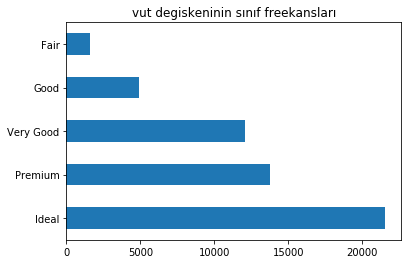

In [13]:
#barplot
df["cut"].value_counts().plot.barh().set_title("vut degiskeninin sınıf freekansları")
#set_title baslık eklemek icin
#bu kodlar uzayarak çirkinleşeceginden aşagıdaki gibide ifade edilebilir

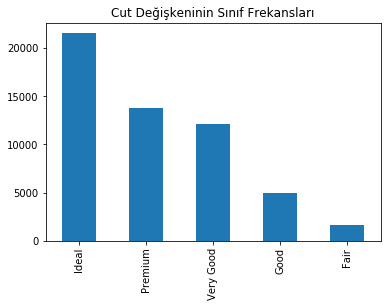

In [14]:
(df["cut"]
 .value_counts()
 .plot.bar()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));


In [15]:
#yukarıdaki görselleştirme "Barplot ile olan", pandas aracılıgı ile idi 
#aşagıda daha ço kkullanacagımız seaborn ile yapalım.

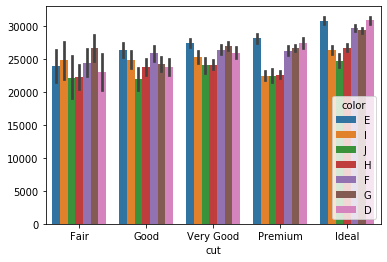

In [16]:
sns.barplot(x="cut",y=df.cut.index,hue="color",data=df)

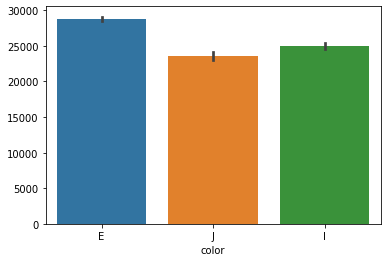

In [17]:
ax = sns.barplot(x="color", y=df.cut.index, data=df,
                order=["E", "J","I"])

<bound method Series.count of Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64>

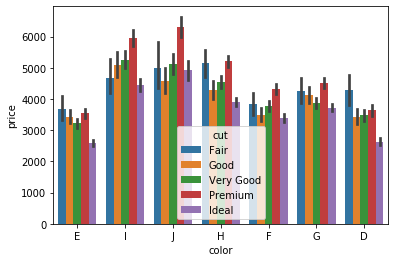

In [18]:
sns.barplot(x="color",y="price",data=df,
           hue="cut")
df["cut"].value_counts().count

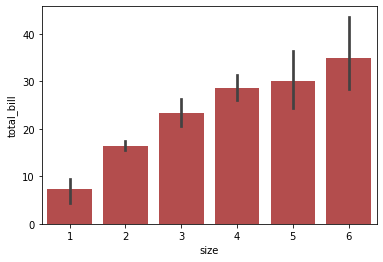

In [30]:
import seaborn as sns
tips = sns.load_dataset("tips")
ax = sns.barplot(x="size", y="total_bill", data=tips,
                 color="red", saturation=.4)

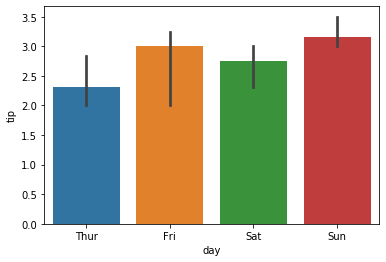

In [31]:
from numpy import median
ax = sns.barplot(x="day", y="tip", data=tips, estimator=median)

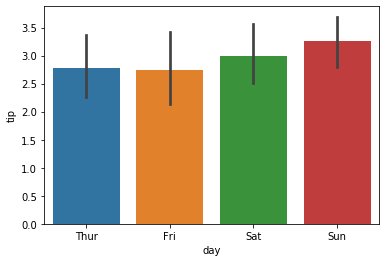

In [39]:
ax = sns.barplot(x="day", y="tip", data=tips, ci=100)

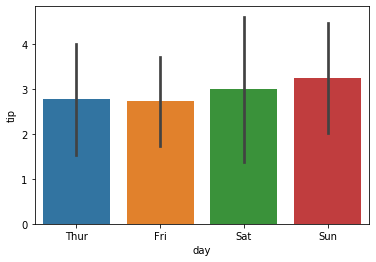

In [33]:
ax = sns.barplot(x="day", y="tip", data=tips, ci="sd")

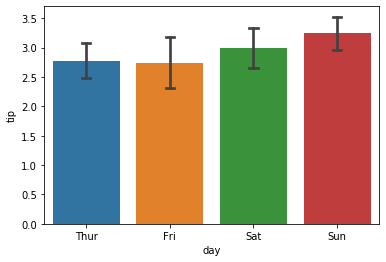

In [41]:
ax = sns.barplot(x="day", y="tip", data=tips, capsize=.1)

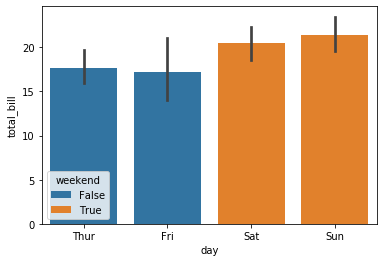

In [35]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.barplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)

In [ ]:
tips["day"].isin(["Sat", "Sun"])